# Unit 5 - Financial Planning

In [112]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [113]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [114]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [115]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [116]:
# Fetch current BTC price
my_btc_value = requests.get(btc_url).json()
print(json.dumps(my_btc_value, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18711737,
            "total_supply": 18711737,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 45727.0,
                    "volume_24h": 59586695412,
                    "market_cap": 860216343649,
                    "percentage_change_1h": -3.03683696077525,
                    "percentage_change_24h": -4.47917656314452,
                    "percentage_change_7d": -22.1965796384967,
                    "percent_change_1h": -3.03683696077525,
                    "percent_change_24h": -4.47917656314452,
                    "percent_change_7d": -22.1965796384967
                },
                "CAD": {
                    "price": 55430.2694,
                    "volume_24h": 72230992178.4264,
                   

In [117]:
btc_value = my_btc_value['data']['1']['quotes']['USD']['price']
btc_value

45727.0

In [118]:
# Fetch current ETH price
my_eth_value = requests.get(eth_url).json()
print(json.dumps(my_eth_value, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115900898,
            "total_supply": 115900898,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3496.76,
                    "volume_24h": 57850650771,
                    "market_cap": 409284741352,
                    "percentage_change_1h": -3.51895433078916,
                    "percentage_change_24h": -6.95954899061947,
                    "percentage_change_7d": -10.6315467167899,
                    "percent_change_1h": -3.51895433078916,
                    "percent_change_24h": -6.95954899061947,
                    "percent_change_7d": -10.6315467167899
                },
                "CAD": {
                    "price": 4238.772472,
                    "volume_24h": 70126558864.6062,
               

In [119]:
eth_value = my_eth_value['data']['1027']['quotes']['USD']['price']
eth_value

3496.76

In [120]:
# Compute current value of my crpto
CV_BTC = btc_value * my_btc
CV_ETH = eth_value * my_eth

In [121]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${CV_BTC:0.2f}")
print(f"The current value of your {my_eth} ETH is ${CV_ETH:0.2f}")

The current value of your 1.2 BTC is $54872.40
The current value of your 5.3 ETH is $18532.83


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [122]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [123]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")

alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [124]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [125]:
# Create the Alpaca API object

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [126]:
# Format current date as ISO format

current_date = pd.Timestamp("2021-05-13", tz="America/New_York").isoformat()
current_date

'2021-05-13T00:00:00-04:00'

In [127]:
# Set the tickers

tickers = ["AGG", "SPY"]

In [128]:
# Set timeframe to '1D' for Alpaca API

timeframe = "1D"

In [129]:
# Get current closing prices for SPY and AGG

# (use a limit=1000 parameter to call the most recent 1000 days of data

# Preview DataFrame

Portfolio_df = api.get_barset(
    tickers,
    timeframe,
    limit= 1000,
    start= current_date,
    end = current_date).df

Portfolio_df



AGG                                       SPY  \
                            open    high     low    close   volume    open   
time                                                                         
2021-05-13 00:00:00-04:00  113.9  114.06  113.78  114.015  5446892  407.07   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-13 00:00:00-04:00  412.35  407.02  410.26  96524121

In [130]:
# Pick AGG and SPY close prices

agg_close_price = float(Portfolio_df['AGG']['close'])
spy_close_price = float(Portfolio_df['SPY']['close'])

In [131]:
# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.015
Current SPY closing price: $410.26


In [132]:
# Compute the current value of shares

my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20513.00
The current value of your 200 AGG shares is $22803.00


### Savings Health Analysis

In [133]:
# Set monthly household income

monthly_income = 12000

In [134]:
# Consolidate financial assets data

total_crypto = CV_ETH + CV_BTC
total_stocks = (my_agg_value) + (my_spy_value)



In [135]:
# Create savings DataFrame
data = {'amount':[total_crypto, total_stocks]}

rows = ['Crypto', 'Stocks']

df_savings = pd.DataFrame(data, index=rows)
df_savings


,amount
Crypto,73405.228
Stocks,43316.000


<AxesSubplot:title={'center':'Savings Compostition'}, ylabel='amount'>

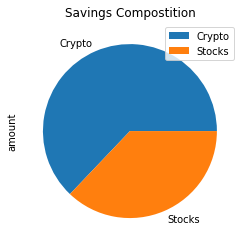

In [136]:
# Plot savings pie chart

df_savings.plot.pie(y="amount", title = "Savings Compostition")                              

In [137]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [138]:
# Calculate total amount of savings

savings = total_crypto + total_stocks
savings


116721.228

In [139]:
# Validate saving health

if savings < emergency_fund:
    print(f"emergency fund does not meet the requirements, an additional {emergency_fund - savings}")
elif savings == emergency_fund:
    print("you have reached your financial goal")
else:
    print("emergency fund is covered by your savings")

emergency fund is covered by your savings


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [140]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [141]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    limit= 1000,
    start= start_date,
    end = end_date).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [142]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# use limit=1000 to call the most recent 1000 days of data

MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [143]:
# Printing the simulation input data

MC_thirtyyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [144]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003293,1.010626,1.008363,0.989467,0.997996,1.006221,1.002744,1.002160,0.995338,1.007097,...,1.006097,1.004395,1.000701,0.995185,0.998026,0.993734,1.000060,1.003140,0.998502,1.006846
2,0.996378,1.012665,1.013513,0.996734,1.002808,1.008069,1.003324,1.012484,0.989826,1.007945,...,1.002328,0.993973,1.000421,0.988484,0.989339,0.992133,0.991837,1.004410,0.995167,1.009582
3,1.000834,1.011851,1.008514,0.988864,1.001914,1.009521,1.010934,1.014568,0.981762,1.002933,...,1.004460,0.993059,0.999298,0.984491,0.985682,0.987784,0.999644,1.002377,0.995724,1.005413
4,0.993409,1.015822,1.008838,0.990689,1.006738,1.011641,1.006215,1.015492,0.988124,1.007313,...,1.006656,0.991274,0.993106,0.982717,0.986805,0.993682,1.007198,0.999378,0.990303,1.010987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.390118,7.572624,9.918476,15.067231,9.834666,9.257014,7.861390,7.338006,4.400900,21.154893,...,9.506199,6.648670,6.587926,8.356681,9.477481,11.202609,14.994236,9.593022,3.446833,8.817565
7557,6.424892,7.549289,9.902818,15.070242,9.908112,9.308808,7.875343,7.346511,4.414269,21.108738,...,9.466393,6.524624,6.605451,8.383283,9.440821,11.288937,14.999399,9.663858,3.483366,8.783014
7558,6.342018,7.574530,9.837702,15.097038,9.940792,9.324578,7.840651,7.323350,4.403332,21.288598,...,9.452836,6.559130,6.561881,8.384118,9.471036,11.361986,14.931128,9.647187,3.431147,8.788294
7559,6.296415,7.579517,9.859523,15.153259,9.972104,9.282826,7.883778,7.332093,4.435078,21.539109,...,9.474335,6.528768,6.557408,8.371255,9.452911,11.388302,14.746848,9.706057,3.436955,8.896970


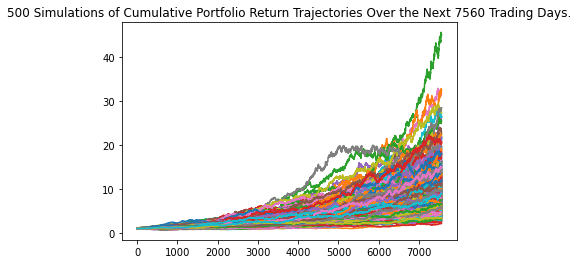

In [148]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()



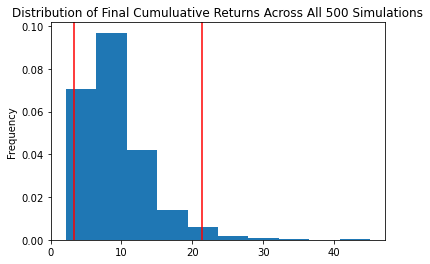

In [146]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [149]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.219555
std               4.917052
min               2.139033
25%               6.069616
50%               8.010646
75%              11.260421
max              45.093335
95% CI Lower      3.282840
95% CI Upper     21.402375
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [150]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $65656.81 and $428047.51


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [151]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $98485.21 and $642071.26
